## **Introduction to Data Science - Nhập môn khoa học dữ liệu - CSC14119**
### **HCMUS - Trường Đại học khoa học tự nhiên - Nov 2024.**
### **HW04 - Data Modeling.**
#### **Due:** 31/12/2024.
#### **Lớp:** 22_21.
#### **Giảng viên hướng dẫn:** Thầy Lê Ngọc Thành - Thầy Lê Nhựt Nam.
#### **Người thực hiện:** Nguyễn Anh Tường.
#### **MSSV:** 22120412.
---

### **Đánh giá tiến độ:**
| **Criteria**                                                                                 | **Mark** | **Is Done?** |
|---------------------------------------------------------------------------------------------|----------|----------|
| Data preparation (Splitting train, valid, test)                                             | 5%       | yes |
| Building predicting models (It should be more than two models for comparison)              | 50%      | yes |
| Model evaluations                                                                           | 20%      | yes |
| Conclusion                                                                                  | 10%      | yes |
| The notebook presents a logical and clear layout and format.                               | 15%      | yes |
| There is analysis, visualization with novel charts, and drawing of useful information.     | 5%       | yes |
| Overall comprehension of the submitted source code.                                        | 5%       | yes |
| **Total**                                                                                  | **110%** | **110%** |

### **Table of Model**
1. Decision Tree.
2. K-Nearest Neighbors.
3. Gradient Boosting.

---

### Cài đặt thư viện nếu chưa có

In [169]:
# !pip install scikit-learn xgboost lightgbm

### Các thư viện sử dụng

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Evaluation and Fine-Tuning Tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Decision tree
from sklearn.tree import DecisionTreeClassifier

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Đọc dữ liệu

In [171]:
df_red = pd.read_csv("Data/winequality-red.csv", sep=';')
#df_red['color'] = 'red'
df_white = pd.read_csv("Data/winequality-white.csv", sep=';')
#df_white['color'] = 'white'
df = pd.concat([df_red, df_white], axis=0, ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Xây dựng mô hình

### **Ý tưởng 01:** Xây dựng mô hình dự đoán chất lượng rượu thông qua tất cả các yếu tố liên quan đến rượu trong tập dữ liệu bằng thuật toán Cây Quyết Định.

### 1. Tạo tập huấn luyện và kiểm thử

In [172]:
df_data = df.iloc[:,:-1].values
df_target = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2,random_state=0)

In [173]:
#TEST
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)

X_train shape: (5197, 11)
Y_train shape: (5197,)


### 2. Xây dựng mô hình Decision Tree thông qua thư viện scikit-learn.
* Ở bước này ta sẽ cũng sử dụng giá trị Depth mặc định là 5 giống với K của thuật toán KNN. Sau đó sẽ tiến hành `fine-tuning` lại sau.

In [174]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)

### 3. Huấn luyện mô hình bằng tập huấn luyện.

In [175]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

### 4. Áp dụng kiểm thử bằng chỉ số score cho mô hình.

In [176]:
tree_model.score(x_test, y_test)

0.5307692307692308

#### Nhận xét:
* Chỉ số score hiện tại là 0.53, tương đối cao. Cho thấy tỉ lệ chính xác của các dự đoán của mô hình là 53%. Tức là dự đoán đúng chất lượng của 53% các sample rượu trong tập `x_test` với kết quả chất lượng tương ứng trong tập `y_test`.

### 5. Áp dụng mô hình để đưa ra dự đoán cho một loại rượu có các giá trị yếu tố là ngẫu nhiên:

In [177]:
tree_model.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.2]])

array([5])

#### Nhận xét: 
Với kết quả trên thì với loại rượu có các chỉ số tương ứng như sau:
  * fixed acidity : 7.4
  * volatile acidity : 0.70
  * citric acid	: 0.00
  * residual sugar : 1.9
  * chlorides	: 0.076
  * free sulfur dioxide	: 11.0
  * total sulfur dioxide	: 34.0
  * density	: 0.9978
  * pH	: 3.51
  * sulphates	: 0.56
  * alcohol	: 9.2

Thì 53% loại rượu này sẽ có chất lượng là `5`.

---

### Fine-Tuning mô hình

**Ý tưởng:** Sử dụng cross validation.

Optimal depth: 18


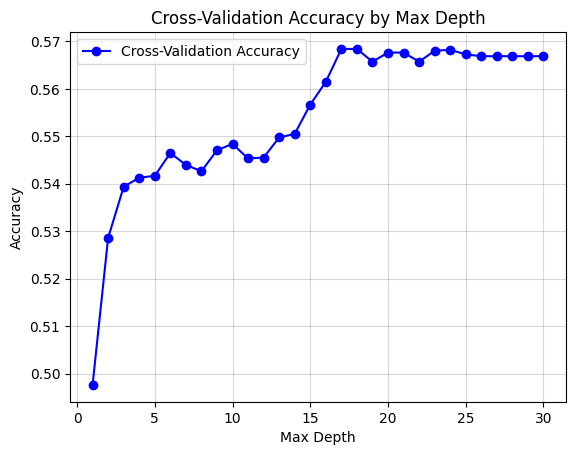

In [178]:
cv_scores = []

for depth in range(1, 31):
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(tree_model, x_train, y_train, cv=4)
    cv_scores.append(np.mean(scores))

#The the maximun average
optimal_depth = np.argmax(cv_scores) + 1
print(f"Optimal depth: {optimal_depth}")

plt.plot(range(1, 31), cv_scores, marker='o', linestyle='-', color='blue', label='Cross-Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy by Max Depth')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Nhận xét
1. Thông qua phương pháp cross validation, ta thử qua toàn bộ tập dữ liệu để kiểm tra và tìm ra độ sâu phù hợp.
2. Kết quả là điểm depth có giá trị chính xác trung bình cao nhất. Với độ sâu thực tế tế là 18. 
3. Nhận thấy các độ chính xác của mô hình ở các depth từ 22 trở đi có dấu hiệu tuyến tính với sự thay đổi không lớn. Do đó có thể kết luận luôn là 18 chính là độ sâu thích hợp nhất với độ chính xác trung bình cao nhất.

---

### Áp dụng mô hình với depth=18

In [179]:
tree_model = DecisionTreeClassifier(max_depth=18)
tree_model.fit(x_train, y_train)
tree_model.score(x_test, y_test)

0.5930769230769231

**Tiến hành dự đoán giá trị cho sample tương tự như lúc xây dựng mô hình ban đầu**

In [180]:
tree_model.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.2]])

array([5])

#### Nhận xét: 
Với kết quả trên thì với loại rượu có các chỉ số tương ứng như sau:
  * fixed acidity : 7.4
  * volatile acidity : 0.70
  * citric acid	: 0.00
  * residual sugar : 1.9
  * chlorides	: 0.076
  * free sulfur dioxide	: 11.0
  * total sulfur dioxide	: 34.0
  * density	: 0.9978
  * pH	: 3.51
  * sulphates	: 0.56
  * alcohol	: 9.2

Thì 59.3% loại rượu này sẽ có chất lượng là `5`.

---
### Trực quan hóa cây quyết định

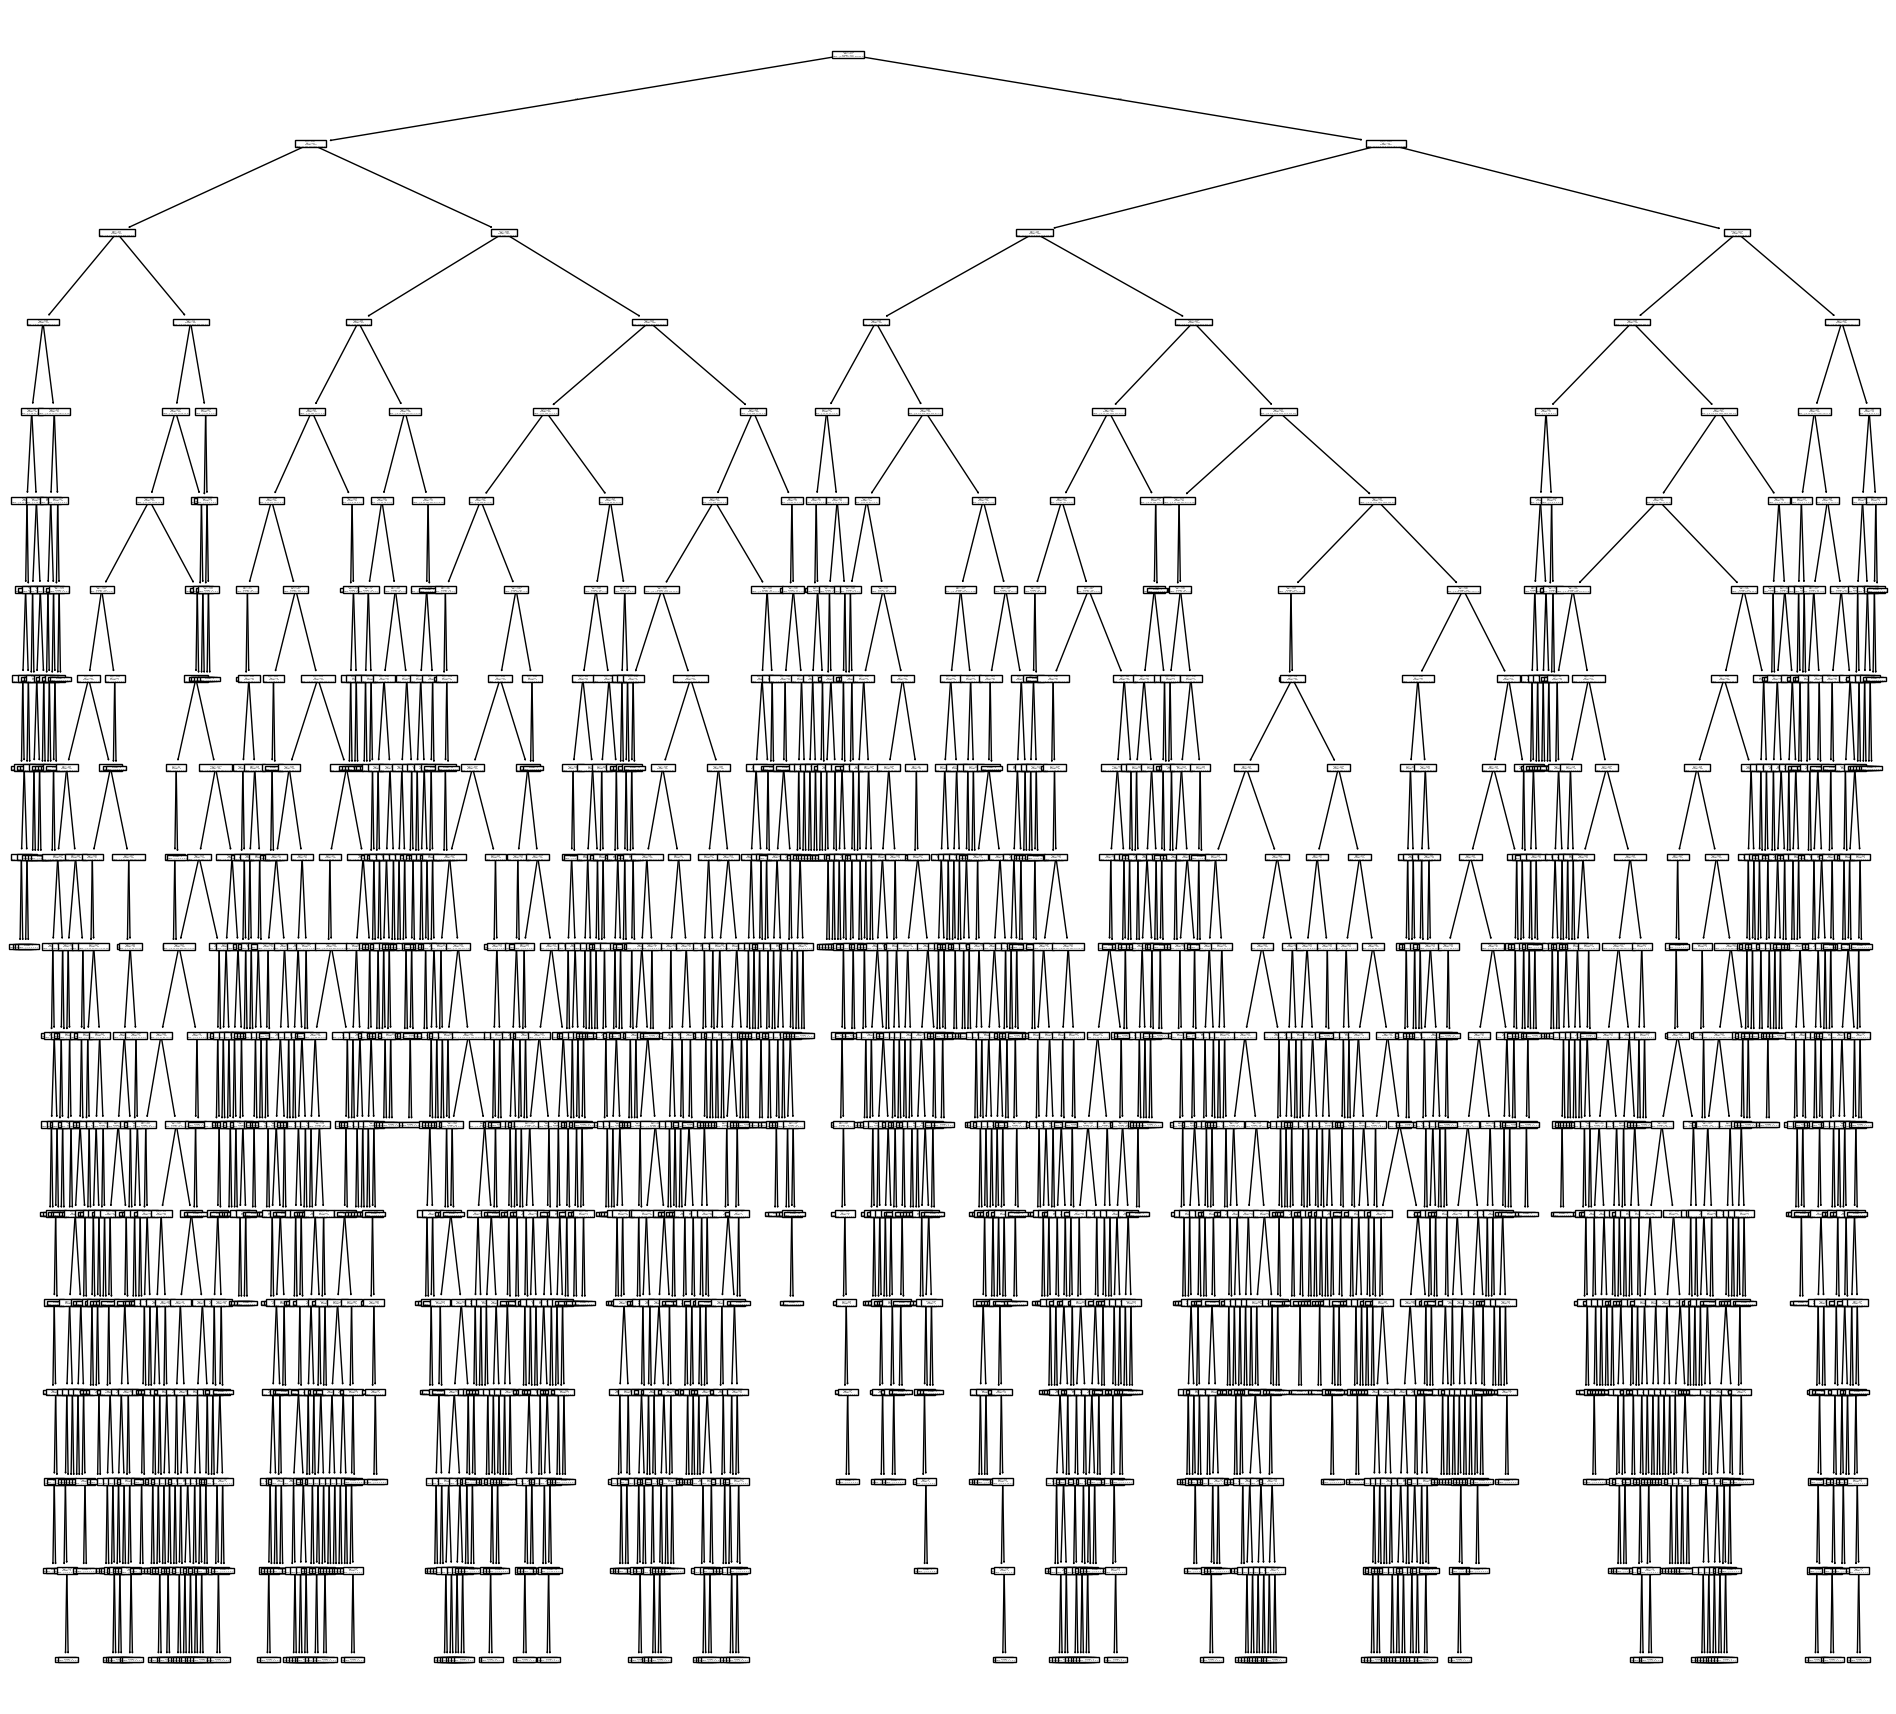

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 22))
plot_tree(tree_model)
plt.show()

---


### **Ý tưởng 02:** Xây dựng mô hình dự đoán chất lượng rượu thông qua tất cả các yếu tố liên quan đến rượu trong tập dữ liệu thông qua thuật toán K-Nearest Neighbors.

### 1. Tạo tập huấn luyện và kiểm thử

In [182]:
df_data = df.iloc[:,:-1].values
df_target = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2,random_state=0)

**Ý nghĩa tham số:**
* `test_size`: giá trị % dữ liệu sẽ được sử dụng để làm tập kiểm thử. Ở đây em sẽ sử dụng 20% ( 0.2 ).
* `random_state`: giúp cố định trạng thái của các vị trí random, giúp mỗi lần chạy đều ra kết quả như nhau.

In [183]:
#TEST
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)

X_train shape: (5197, 11)
Y_train shape: (5197,)


### 2. Xây dựng mô hình KNN thông qua thư viện scikit-learn.
* Ở bước này ta sẽ sử dụng giá trị K mặc định của thư viện là 5. Sau đó sẽ tiến hành `fine-tuning` lại sau.

In [184]:
knn_model = KNeighborsClassifier()

### 3. Huấn luyện mô hình bằng tập huấn luyện.

In [185]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

### 4. Áp dụng kiểm thử bằng chỉ số score cho mô hình.

In [186]:
knn_model.score(x_test, y_test)

0.48615384615384616

#### Nhận xét:
* Chỉ số score hiện tại là 0.49, tương đối ổn. Cho thấy tỉ lệ chính xác của các dự đoán của mô hình là 49%. Tức là dự đoán đúng chất lượng của 49% các sample rượu trong tập `x_test` với kết quả chất lượng tương ứng trong tập `y_test`.

### 5. Áp dụng mô hình để đưa ra dự đoán cho một loại rượu có các giá trị yếu tố là ngẫu nhiên:

In [187]:
knn_model.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.2]])

array([5])

#### Nhận xét: 
Với kết quả trên thì với loại rượu có các chỉ số tương ứng như sau:
  * fixed acidity : 7.4
  * volatile acidity : 0.70
  * citric acid	: 0.00
  * residual sugar : 1.9
  * chlorides	: 0.076
  * free sulfur dioxide	: 11.0
  * total sulfur dioxide	: 34.0
  * density	: 0.9978
  * pH	: 3.51
  * sulphates	: 0.56
  * alcohol	: 9.2

Thì 49% loại rượu này sẽ có chất lượng là `5`.

---

### Fine-Tuning mô hình

**Ý tưởng:** Ta sẽ tính toán độ chính xác của mô hình với từng `k` khác nhau từ 1 đến 20. Sau đó chọn xem đâu là lựa chọn `k` thích hợp cho mô hình này ( độ chính xác cao nhất ). Với K là số "láng giềng" gần nhất với điểm dự liệu cần dự đoán.

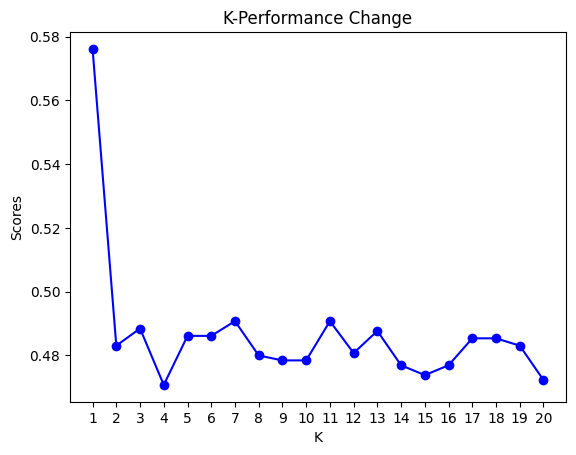

In [188]:
k_performance = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    k_performance.append(knn_model.score(x_test, y_test))

#Visualize the result of K-Performance
plt.plot(range(1, 21), k_performance, marker='o', linestyle='-', color='b')
plt.xticks(ticks=range(1, 21))
plt.xlabel('K')
plt.ylabel('Scores')
plt.title('K-Performance Change')
plt.show()

### Nhận xét

1. **Chọn K:**
   - K = 1 có độ chính xác cao nhất là ~0.58 , nhưng khi sử dụng K = 1 thì mô hình:
     - Mô hình rất nhạy với nhiễu noise, dễ dẫn đến **overfitting**.
     - Kết quả phụ thuộc mạnh vào điểm gần nhất, không phản ánh được đặc điểm tổng quát của dữ liệu.

   -  K  nên được chọn trong khoảng mà độ chính xác ổn định hơn, ví dụ:
        * K = 5, 6, 9 : Hiệu suất ổn định ~ 0.48 - 0.49 .

2. **Lý do chọn  K = 5, 6, 9 :**
   - **Ổn định:** Độ chính xác không dao động mạnh khi  K  thay đổi. Không giảm đột ngột lớn hay tăng đột ngột lớn sau khi qua giá trị này.
   - Cân bằng giữa tính tổng quát hóa và hiệu suất.

---

### Fine_tuning bằng cross validation

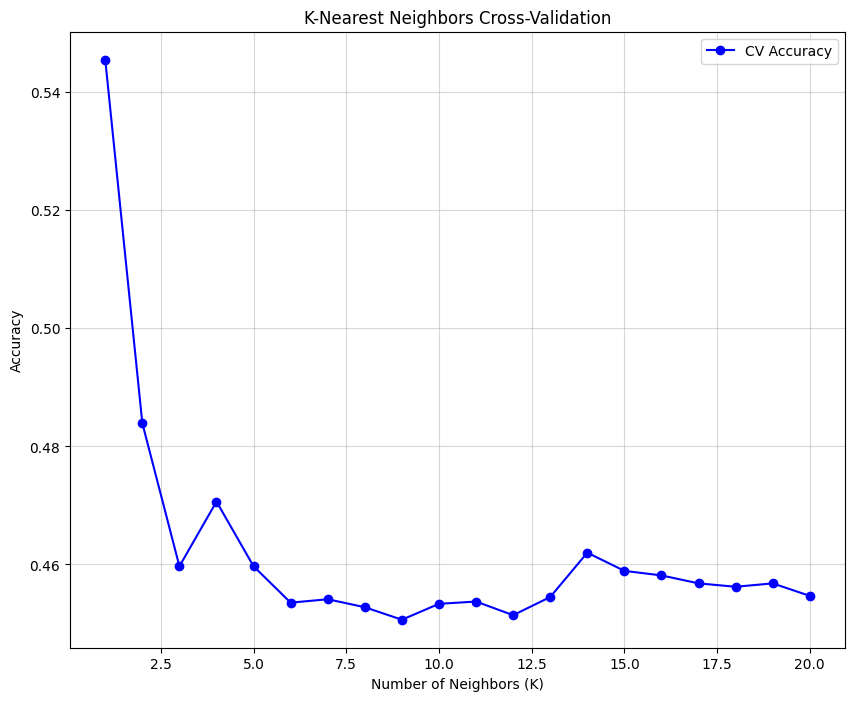

In [189]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(10, 8))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue', label='CV Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Cross-Validation')
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
plt.show()

**Nhận xét:**
* Sau khi thực hiện cross validation cho toàn tập thì ta thu được kết quả với một số điểm K phù hợp với độ ổn định cao và độ chính xác cao như K=5, K=14. Các giá trị sau giá trị này mặc dù có độ chính xác giảm nhưng không lớn. Hơn nữa, độ chính xác tại k=5 và 14 đều tương đối cao với >46%.

### Kết luận:
- Dựa trên biểu đồ, giá trị K tối ưu nằm ở khoảng  K = 5, 6  hoặc  K = 8, 9, 15. Nhưng ở đây ta sẽ ưu tiên K= 5,6 vì các số K quá lớn thì mô hình sẽ dễ bị tổng quát hóa và dẫn đến sai sót.
- Ta sẽ xây dựng mô hình với k = 6 tiếp thep, vì K = 5 đã được cài đặt ở phần trên ( giá trị mặc định của thuật toán khi cài đặt bằng thư viện Scikit-learn ).

### Áp dụng mô hình với K = 6

In [190]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train, y_train)
knn_model.score(x_test, y_test)

0.48615384615384616

**Tiến hành dự đoán giá trị cho sample tương tự như lúc xây dựng mô hình ban đầu**

In [191]:
knn_model.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.2]])

array([5])

#### Nhận xét: 
Với kết quả trên thì với loại rượu có các chỉ số tương ứng như sau:
  * fixed acidity : 7.4
  * volatile acidity : 0.70
  * citric acid	: 0.00
  * residual sugar : 1.9
  * chlorides	: 0.076
  * free sulfur dioxide	: 11.0
  * total sulfur dioxide	: 34.0
  * density	: 0.9978
  * pH	: 3.51
  * sulphates	: 0.56
  * alcohol	: 9.2

Thì 48.61% loại rượu này sẽ có chất lượng là `5`.

---

### **Ý tưởng 03:** Xây dựng mô hình dự đoán chất lượng rượu thông qua tất cả các yếu tố liên quan đến rượu trong tập dữ liệu thông qua thuật toán Gradient Boosting.

### 1. Tạo tập huấn luyện và kiểm thử

In [192]:
df_data = df.iloc[:,:-1].values
df_target = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2,random_state=0)

**Ý nghĩa tham số:**
* `test_size`: giá trị % dữ liệu sẽ được sử dụng để làm tập kiểm thử. Ở đây em sẽ sử dụng 20% ( 0.2 ).
* `random_state`: giúp cố định trạng thái của các vị trí random, giúp mỗi lần chạy đều ra kết quả như nhau.

In [193]:
#TEST
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)

X_train shape: (5197, 11)
Y_train shape: (5197,)


### 2. Xây dựng mô hình Gradient Boosting thông qua thư viện scikit-learn.

In [194]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

**Ý nghĩa của các tham số:**
* `learning_rate`: Tốc độ học (rate at which the model learns). Giá trị nhỏ (0.01–0.2) giúp mô hình tổng quát tốt hơn nhưng yêu cầu số lượng cây lớn hơn (`n_estimators`). Ở đây e sẽ sử dụng giá trị mặc định là 0.1
* `n_estimators`: Số lượng cây trong mô hình. **Lưu ý:** Giá trị cao giúp tăng khả năng học nhưng có thể dẫn đến overfitting nếu không kiểm soát cho nên e sẽ sử dụng số lượng ban đầu là 100.
* `max_depth`: Độ sâu tối đa của mỗi cây,giúp kiểm soát độ phức tạp của cây. Giá trị thấp giúp tránh overfitting (thường từ 3–10). E sử dụng mặc định là 3.
* `random_state`: giúp cố định kết quả, đảm bảo mỗi lần chạy kết quả sẽ giống nhau.

### 3. Huấn luyện mô hình bằng tập huấn luyện.

In [195]:
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

### 4. Áp dụng kiểm thử bằng chỉ số score cho mô hình.

In [196]:
y_pred = gb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5815384615384616


#### Nhận xét:
* Chỉ số score hiện tại là 0.58, khá cao. Cho thấy tỉ lệ chính xác của các dự đoán của mô hình là 58%. Tức là dự đoán đúng chất lượng của 58% các sample rượu trong tập `x_test` với kết quả chất lượng tương ứng trong tập `y_test`.

### 5. Áp dụng mô hình để đưa ra dự đoán cho một loại rượu có các giá trị yếu tố là ngẫu nhiên:

In [197]:
gb_model.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.2]])

array([5])

#### Nhận xét: 
Với kết quả trên thì với loại rượu có các chỉ số tương ứng như sau:
  * fixed acidity : 7.4
  * volatile acidity : 0.70
  * citric acid	: 0.00
  * residual sugar : 1.9
  * chlorides	: 0.076
  * free sulfur dioxide	: 11.0
  * total sulfur dioxide	: 34.0
  * density	: 0.9978
  * pH	: 3.51
  * sulphates	: 0.56
  * alcohol	: 9.2

Thì 58% loại rượu này sẽ có chất lượng là `5`.

---

### Fine-Tuning mô hình

**Ý tưởng:** Ta sẽ sử dụng phương pháp Random Search Cross Validation để tiến hành đánh giá và tinh chỉnh.

In [ ]:
#Reference form IBM Coursera Course 09 - Data Modeling with Python.
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=4,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Accuracy: 0.6478776573695741


### Nhận xét:
* Lý do chọn param_grid là các số như vậy:
  * Đây là các giá trị thường thấy, giá trị ở giữa là trung bình của giá trị 2 biên.
  * Riêng subsample thì: đây là tỷ lệ dữ liệu huấn luyện được sử dụng để xây dựng mỗi cây con.
    * 0.8 (80%): Giúp giảm overfitting bằng cách tăng tính ngẫu nhiên.
    * 1.0 (100%): Sử dụng toàn bộ dữ liệu, giảm phương sai (variance) nhưng có thể tăng nguy cơ overfitting.
* Độ chính xác "TRUNG BÌNH" tốt nhất mà mô hình có thể đạt được là : 64.79%.
* Các siêu tham số tốt nhất cho mô hình là:
  * learning_rate: 0.1
  * max_depth: 5
  * n_estimators: 300
  * subsample: 0.8

---

### Xây dựng mô hình với các siêu tham số đã được tinh chỉnh

In [199]:
gb_model = GradientBoostingClassifier(n_estimators= 300, learning_rate= 0.1, max_depth= 5,subsample= 0.8, random_state= 42)

**Ý nghĩa của các tham số:**
* `learning_rate`: Tốc độ học (rate at which the model learns). Giá trị nhỏ (0.01–0.2) giúp mô hình tổng quát tốt hơn nhưng yêu cầu số lượng cây lớn hơn (`n_estimators`).
* `n_estimators`: Số lượng cây trong mô hình. **Lưu ý:** Giá trị cao giúp tăng khả năng học nhưng có thể dẫn đến overfitting nếu không kiểm soát.
* `max_depth`: Độ sâu tối đa của mỗi cây,giúp kiểm soát độ phức tạp của cây. Giá trị thấp giúp tránh overfitting (thường từ 3–10).
* `random_state`: giúp cố định kết quả, đảm bảo mỗi lần chạy kết quả sẽ giống nhau.

### 2. Huấn luyện mô hình bằng tập huấn luyện.

In [200]:
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=42,
                           subsample=0.8)

### 3. Áp dụng kiểm thử bằng chỉ số score cho mô hình.

In [201]:
y_pred = gb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6623076923076923


#### Nhận xét:
* Chỉ số score hiện tại là 0.66, rất cao. Cho thấy tỉ lệ chính xác của các dự đoán của mô hình là 66%. Tức là dự đoán đúng chất lượng của 66% các sample rượu trong tập `x_test` với kết quả chất lượng tương ứng trong tập `y_test`.

### 4. Áp dụng mô hình để đưa ra dự đoán cho một loại rượu có các giá trị yếu tố là ngẫu nhiên:

In [202]:
gb_model.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.2]])

array([5])

#### Nhận xét: 
Với kết quả trên thì với loại rượu có các chỉ số tương ứng như sau:
  * fixed acidity : 7.4
  * volatile acidity : 0.70
  * citric acid	: 0.00
  * residual sugar : 1.9
  * chlorides	: 0.076
  * free sulfur dioxide	: 11.0
  * total sulfur dioxide	: 34.0
  * density	: 0.9978
  * pH	: 3.51
  * sulphates	: 0.56
  * alcohol	: 9.2

Thì 66% loại rượu này sẽ có chất lượng là `5`.